- scikit-image https://scikit-image.org
- OpenCV https://opencv.org
- Python Image Library (PIL) http://www.pythonware.com/products/pil/ (deplicated)
- Pillow or (PIL) https://pillow.readthedocs.io/en/stable/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow

import skimage
from skimage.io import imread, imsave

from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu, threshold_local
from skimage.exposure import histogram, adjust_gamma
from skimage.morphology import square
from skimage import measure, color, morphology

import cv2

import numpy as np

from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

<Figure size 432x288 with 0 Axes>

# 画像ダウンロード

In [2]:
import requests
def download(url, filename):
    with open(filename, 'wb') as saveFile:
        saveFile.write(requests.get(url).content)
    
# TheDefiniteArticle - Own work CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Woy_Woy_Channel_-_Vignetted.jpg
download('https://upload.wikimedia.org/wikipedia/commons/0/03/Woy_Woy_Channel_-_Vignetted.jpg',
         'lake.jpg')

# Pixabay License
# https://pixabay.com/photos/girl-portrait-looking-young-female-919048/
download('https://cdn.pixabay.com/photo/2015/09/02/13/24/girl-919048_1280.jpg',
         'girl.jpg')

# Baka888 - Own work CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Worldflags19.png
download('https://upload.wikimedia.org/wikipedia/commons/b/bb/Worldflags19.png',
         'flag.png')

# yellowcloud CC BY 2.0
# https://www.flickr.com/photos/yellowcloud/6375883291
download('https://live.staticflickr.com/6226/6375883291_972be61f52_w_d.jpg',
         'IR_cat.jpg')

# Achim Köhler~commonswiki CC BY-SA 3.0
# https://commons.wikimedia.org/w/index.php?curid=555450
download('https://upload.wikimedia.org/wikipedia/commons/3/32/Dead_tree_salt_and_pepper.png',
         'salt_and_pepper.png')

# Pixabay License
# https://pixabay.com/ja/illustrations/ハニカム-蜂の巣-自然-2891372/
download('https://cdn.pixabay.com/photo/2017/10/26/15/05/honeycomb-2891372_1280.jpg',
         'honeycomb.jpg')

# Christoph Michels - Own work CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Text.JPG
download('https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Text.JPG/640px-Text.JPG',
         'text.jpg')

# 由紀奈 / CC0
# https://commons.wikimedia.org/wiki/File:Start.wav
download('https://upload.wikimedia.org/wikipedia/commons/9/93/Start.wav',
         'start.wav')

# Shirt58 CC0
# https://en.wikipedia.org/wiki/File:Shirt58_handwriting.png
download('https://upload.wikimedia.org/wikipedia/en/thumb/5/5d/Shirt58_handwriting.png/800px-Shirt58_handwriting.png',
         'writing.png')

# Tkgd2007 - Own work CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Human_evolution.svg
download('https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Human_evolution.svg/600px-Human_evolution.svg.png',
         'evol.png')

# Designguy84 - Photo CC BY-SA 3.0
# https://commons.wikimedia.org/wiki/File:Early_Imperial_Australian_Coins.jpg
download('https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Early_Imperial_Australian_Coins.jpg/320px-Early_Imperial_Australian_Coins.jpg',
         'coins.jpg')

# Donald Trung CC BY-SA 4.0
# https://commons.wikimedia.org/wiki/File:Taxi_Noord_business_card,_Oude_Pekela_(2020)_02.jpg
download('https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Taxi_Noord_business_card%2C_Oude_Pekela_%282020%29_02.jpg/640px-Taxi_Noord_business_card%2C_Oude_Pekela_%282020%29_02.jpg',
         'card.jpg')

# Diliff - Own work CC BY-SA 2.5
# http://en.wikipedia.org/wiki/File:Colosseum_in_Rome,_Italy_-_April_2007.jpg
download('https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg/640px-Colosseum_in_Rome%2C_Italy_-_April_2007.jpg',
         'Colosseum.jpg')
download('https://upload.wikimedia.org/wikipedia/commons/5/53/Colosseum_in_Rome%2C_Italy_-_April_2007.jpg',
         'Colosseum_original.jpg')


# OpenCV BSD
download('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeL.jpg', 'aloeL.jpg')
download('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/aloeR.jpg', 'aloeR.jpg')   

In [3]:
# Axel Jacobs (Photographer) - Axel Jacobs, WebHDR CC BY-SA 2.0
# https://commons.wikimedia.org/wiki/File:HDRI_Sample_Scene_Window_-_01.jpg
# ..
# https://commons.wikimedia.org/wiki/File:HDRI_Sample_Scene_Window_-_12.jpg

urls = \
['https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_01.jpg',
'https://upload.wikimedia.org/wikipedia/commons/c/c1/HDRI_Sample_Scene_Window_-_02.jpg',
'https://upload.wikimedia.org/wikipedia/commons/5/5b/HDRI_Sample_Scene_Window_-_03.jpg',
'https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_04.jpg',
'https://upload.wikimedia.org/wikipedia/commons/d/d1/HDRI_Sample_Scene_Window_-_05.jpg',
'https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_06.jpg',
'https://upload.wikimedia.org/wikipedia/commons/b/b6/HDRI_Sample_Scene_Window_-_07.jpg',
'https://upload.wikimedia.org/wikipedia/commons/f/f8/HDRI_Sample_Scene_Window_-_08.jpg',
'https://upload.wikimedia.org/wikipedia/commons/8/83/HDRI_Sample_Scene_Window_-_09.jpg',
'https://upload.wikimedia.org/wikipedia/commons/c/c0/HDRI_Sample_Scene_Window_-_10.jpg',
'https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_11.jpg',
'https://upload.wikimedia.org/wikipedia/commons/8/8b/HDRI_Sample_Scene_Window_-_12.jpg']


for i, url in enumerate(urls):
    filename = 'hdr_{:02d}.jpg'.format(i)
    print(url, filename)
    download(url, filename)

https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_01.jpg hdr_00.jpg
https://upload.wikimedia.org/wikipedia/commons/c/c1/HDRI_Sample_Scene_Window_-_02.jpg hdr_01.jpg
https://upload.wikimedia.org/wikipedia/commons/5/5b/HDRI_Sample_Scene_Window_-_03.jpg hdr_02.jpg
https://upload.wikimedia.org/wikipedia/commons/6/6e/HDRI_Sample_Scene_Window_-_04.jpg hdr_03.jpg
https://upload.wikimedia.org/wikipedia/commons/d/d1/HDRI_Sample_Scene_Window_-_05.jpg hdr_04.jpg
https://upload.wikimedia.org/wikipedia/commons/5/51/HDRI_Sample_Scene_Window_-_06.jpg hdr_05.jpg
https://upload.wikimedia.org/wikipedia/commons/b/b6/HDRI_Sample_Scene_Window_-_07.jpg hdr_06.jpg
https://upload.wikimedia.org/wikipedia/commons/f/f8/HDRI_Sample_Scene_Window_-_08.jpg hdr_07.jpg
https://upload.wikimedia.org/wikipedia/commons/8/83/HDRI_Sample_Scene_Window_-_09.jpg hdr_08.jpg
https://upload.wikimedia.org/wikipedia/commons/c/c0/HDRI_Sample_Scene_Window_-_10.jpg hdr_09.jpg
https://upload.wikimedia.org/w

# 配列へのアクセス：行，列

- 配列へのアクセスの順番
 - 行，列
- 画素へのアクセスの順番
 - 縦，横
 - y, x
- ループを回すなら外側がy，内側がx
 - 配列2つ目のインデックスのほうが連続したメモリ領域

例：

[[  0. 255.   0.]
 [  0.   0.   0.]]


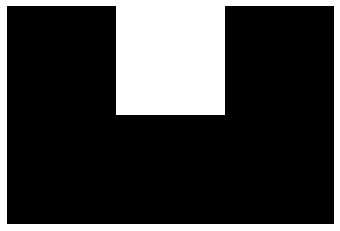

In [4]:
im = np.zeros((2, 3)) # 幅3✕高さ2の画像（配列） 要素ゼロの配列を作るときに使う
im[0, 1] = 255 # (x,y)=(1,0)の画素へアクセス
print(im)

imshow(im)
plt.axis('off')#メモリなしにする
plt.show()

C言語なら
<pre>
#include <stdio.h>
int main(void){
    
    float im[2][3];
    im[0][1] = 255;
    for(int y = 0; y < 2; y++) {
        for(int x = 0; x < 3; x++)
            printf("%.2f, ", im[y][x]);
        printf("\n");
    }
    return 0;
}
</pre>

# カラー画像とグレースケール画像

shape:  (853, 1280, 3)
row:  853
col:  1280
chn:  3


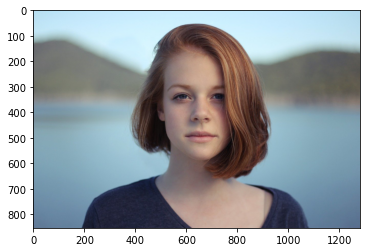

In [5]:
im = imread('girl.jpg')
imshow(im)

print('shape: ', im.shape)
rows, columns, channels = im.shape
print("row: ", rows) #行の数 高さ
print("col: ", columns) #画像の横　幅　列
print("chn: ", channels) #３チャンネルRGBあるよってこと

shape:  (853, 1280)
row:  853
col:  1280
chn:  3


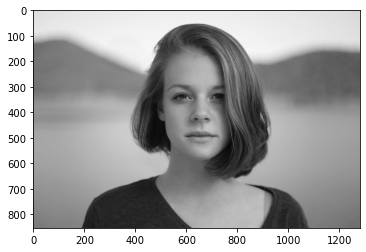

In [6]:
im = rgb2gray(imread('girl.jpg'))
imshow(im)

print('shape: ', im.shape)
rows, columns = im.shape
print("row: ", rows)
print("col: ", columns)
print("chn: ", channels)

# RGBチャンネル

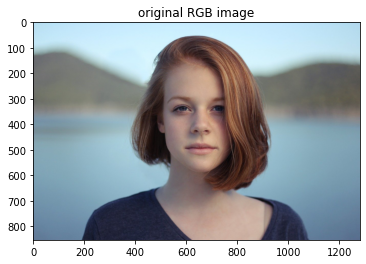

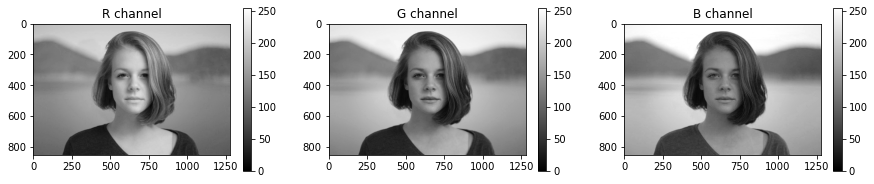

In [23]:
# im = imread('lake.jpg')
# im = imread('flag.png')
im = imread('girl.jpg')

imshow(im)
plt.title("original RGB image")
plt.show()

r_channel = im[:, :, 0]
g_channel = im[:, :, 1]
b_channel = im[:, :, 2]

fig = plt.figure(figsize=(15,3))

for i, c in zip(range(3), 'RGB'):
    ax = fig.add_subplot(1, 3, i + 1)
    imshow(im[:, :, i], vmin=0, vmax=255)
    plt.colorbar()
    plt.title('{} channel'.format(c))

plt.show();

# 3次元配列でのカラー画像の表現

## Packed format
- 画素へのアクセスの順番
 - 縦，横，チャンネル
 - y, x, color
 - 1画素の色情報のメモリ領域が連続している
- 多くの場合はこれ

[[  0 255   0   0]
 [  0   0   0   0]]
[[0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]]


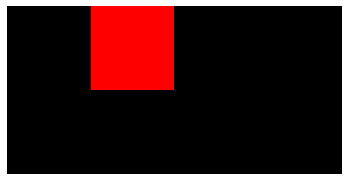

In [7]:
im = np.zeros((2, 4, 3), dtype=np.uint8) # 縦2，横4，3チャンネル分

im[0, 1, 0] = 255

print(im[:, :, 0]) # 赤：0番目のチャンネル
print(im[:, :, 1]) # 緑：1番目のチャンネル
print(im[:, :, 2]) # 青：2番目のチャンネル

imshow(im)
plt.axis('off')
plt.show()

## Planar format
- 画素へのアクセスの順番
- チャンネル，縦，横
 - channel, y, x
 - 「2x3の画像」のメモリ領域が連続している
- 特殊用途
 - 一部の動画フォーマット
 - 深層学習では「バッチ」

In [8]:
im = np.zeros((3, 2, 4), dtype=np.uint8) # 画像を3枚，縦2，横4
im[0, 0, 1] = 255
print(im)

[[[  0 255   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]]]


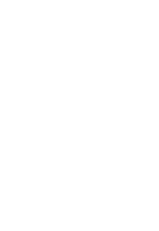

In [9]:
imshow(im) # imshowはpacked formatを仮定しているので，このplanar formatを表示するとおかしなことになる
plt.axis('off')
plt.show()

# RGBとBGR

## RGB
- 多くの教科書の説明もこれ
- 多くの画像処理ライブラリはこれ
 - pythonならskimage, matplotlib

[[  0 255   0   0]
 [  0   0   0   0]]
[[0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]]


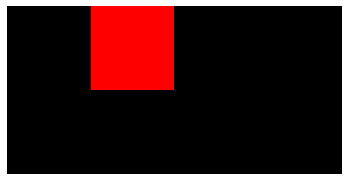

In [26]:
im = np.zeros((2, 4, 3), dtype=np.uint8) # 縦2，横4，3チャンネル分

im[0, 1, 0] = 255

print(im[:, :, 0]) # 赤：0番目のチャンネル
print(im[:, :, 1]) # 緑：1番目のチャンネル
print(im[:, :, 2]) # 青：2番目のチャンネル

imshow(im)
plt.axis('off')
plt.show()

## BGR
- こちらもよく使われる
 - opencv（python, C/C++）
 - WindowsのCOLORREF（16進で0x00bbggrr）
 - ハードウェア

- データの解釈の違いだけ

In [27]:
im = np.zeros((2, 4, 3), dtype=np.uint8)

im[0, 1, 0] = 255

print(im[:, :, 0]) # 青：0番目のチャンネル
print(im[:, :, 1]) # 緑：1番目のチャンネル
print(im[:, :, 2]) # 赤：2番目のチャンネル

[[  0 255   0   0]
 [  0   0   0   0]]
[[0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]]


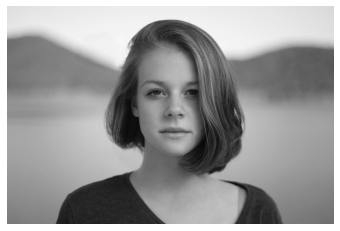

In [26]:
imshow(im) # このmatplotlibのimshowはRGBを仮定
plt.axis('off')
plt.show()

In [ ]:
# opencvのimshowはBGRを仮定
cv2.imshow('opencv imshow window', cv2.resize(im, (400, 200), interpolation=cv2.INTER_NEAREST))
cv2.waitKey(3000)  # 3000ms（3秒）待つ
cv2.destroyWindow('opencv imshow window') # 消えないかもしれないけど無視

## BGRとRGBの変換

In [11]:
im_BGR = cv2.imread('girl.jpg') # OpenCV
im_RGB = imread('girl.jpg') # scikit-image

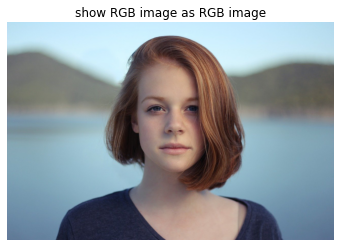

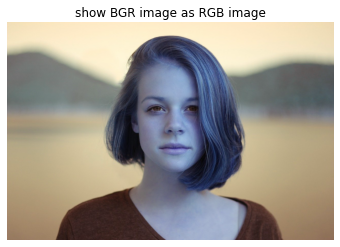

In [12]:
#matplot もRGB形式なのでopencvのRGB形式では入れ替わったおかしな画像が週つりょくされる

imshow(im_RGB) # matplotlibのimshowはRGBを仮定
plt.title('show RGB image as RGB image')
plt.axis('off')
plt.show()

imshow(im_BGR) # matplotlibのimshowはRGBを仮定
plt.title('show BGR image as RGB image')
plt.axis('off')
plt.show()

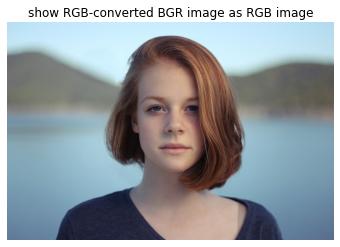

In [13]:
im_BGR_to_RGB = cv2.cvtColor(im_BGR, cv2.COLOR_BGR2RGB) #opencvにはBGRをRBGに変換する関数がある　
imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image as RGB image')
plt.axis('off')
plt.show()

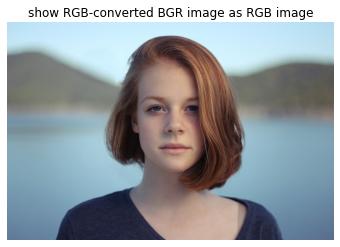

In [14]:
im_BGR_to_RGB = im_BGR[:, :, ::-1] #別の書き方
imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image as RGB image')
plt.axis('off')
plt.show()

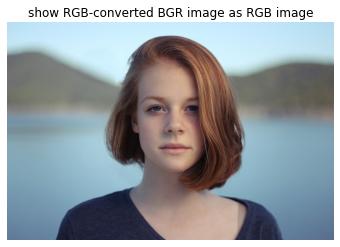

In [15]:
im_BGR_to_RGB = np.zeros_like(im_BGR)

im_BGR_to_RGB[:, :, 0] = im_BGR[:, :, 2]
im_BGR_to_RGB[:, :, 1] = im_BGR[:, :, 1]
im_BGR_to_RGB[:, :, 2] = im_BGR[:, :, 0]

imshow(im_BGR_to_RGB)
plt.title('show RGB-converted BGR image as RGB image')
plt.axis('off')
plt.show()

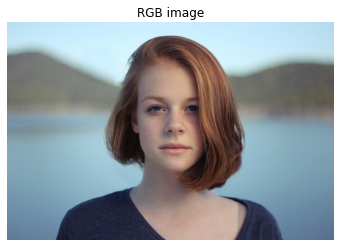

In [16]:
imsave('girl_rgb.jpg', im_RGB) # scikit-image: RGB
im = imread('girl_rgb.jpg') # scikit-image: RGB
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

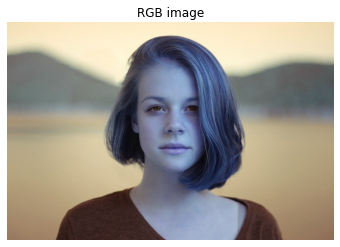

In [17]:
cv2.imwrite('girl_rgb.jpg', im_RGB) # Opencv: BGR
im = imread('girl_rgb.jpg') # scikit-image: RGB
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

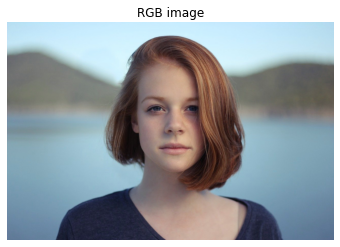

In [18]:
cv2.imwrite('girl_rgb.jpg', im_RGB) # OpenCV: BGR
im = cv2.imread('girl_rgb.jpg') # OpenCV: BGR
imshow(im) # matplotlib: RGB
plt.title('RGB image')
plt.axis('off')
plt.show()

# グレースケールへの変換

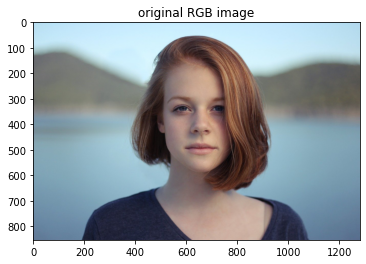

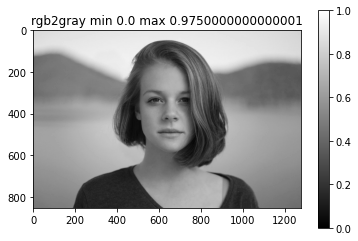

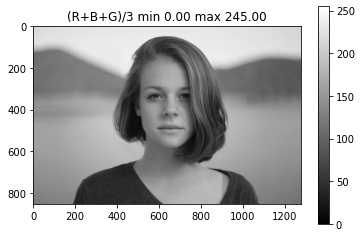

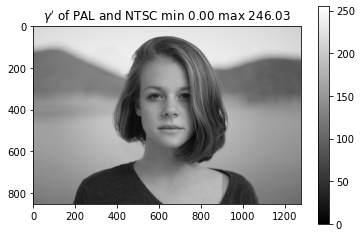

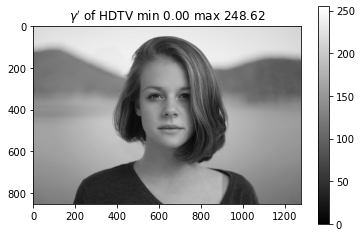

In [19]:
# im = imread('lake.jpg')
# im = imread('flag.png')[:,:,:3]  # RGBAの場合はRGBだけ取り出す
im = imread('girl.jpg')

imshow(im)
plt.title("original RGB image")
plt.show()

# 組み込みのrgb2gray関数を使う gray = 0.2125 R + 0.7154 G + 0.0721 B
im_gray1 = rgb2gray(im)
imshow(im_gray1, vmin=0, vmax=1) # 型はfloat，範囲は[0,1]になる
plt.colorbar()
plt.title("rgb2gray min {0} max {1}".format(im_gray1.min(), im_gray1.max() ))
plt.show()

# RGBの平均をグレースケール画像とする．最初にfloatに変換し（範囲は[0,255]になる），表示のときにuint8に変換する
im_gray2 = (im[:,:,0].astype(float) +
            im[:,:,1].astype(float) + 
            im[:,:,2].astype(float)) / 3
imshow(im_gray2, vmin=0, vmax=255)
plt.colorbar()
plt.title("(R+B+G)/3 min {0:.2f} max {1:.2f}".format(im_gray2.min(), im_gray2.max() ))
plt.show()


# RGBの重み付き平均をグレースケール画像とする．
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
im_gray3 = (0.299 * im[:,:,0].astype(float) +
            0.587 * im[:,:,1].astype(float) + 
            0.114 * im[:,:,2].astype(float))
imshow(im_gray3, vmin=0, vmax=255)
plt.colorbar()
plt.title("$\gamma'$ of PAL and NTSC min {0:.2f} max {1:.2f}".format(im_gray3.min(), im_gray3.max() ))
plt.show()

# RGBの重み付き平均をグレースケール画像とする．その2．規格によって重み係数は異なる
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
# rgb2gray()はこれを使っている．http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray
im_gray4 = (0.2126 * im[:,:,0].astype(float) +
            0.7152 * im[:,:,1].astype(float) + 
            0.0722 * im[:,:,2].astype(float))
imshow(im_gray4, vmin=0, vmax=255)
plt.colorbar()
plt.title("$\gamma'$ of HDTV min {0:.2f} max {1:.2f}".format(im_gray4.min(), im_gray4.max() ))
plt.show()

# ヒストグラム

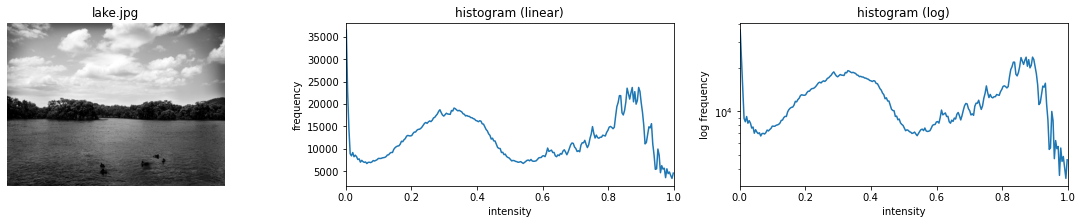

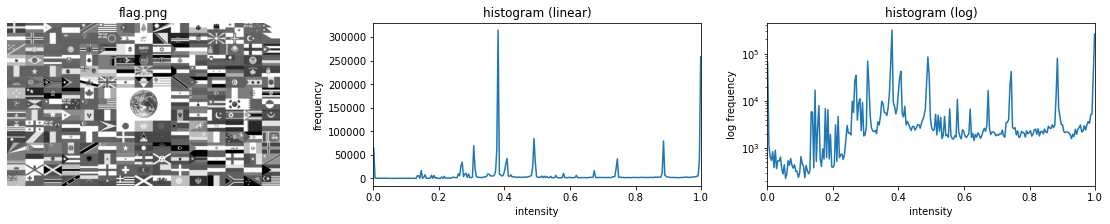

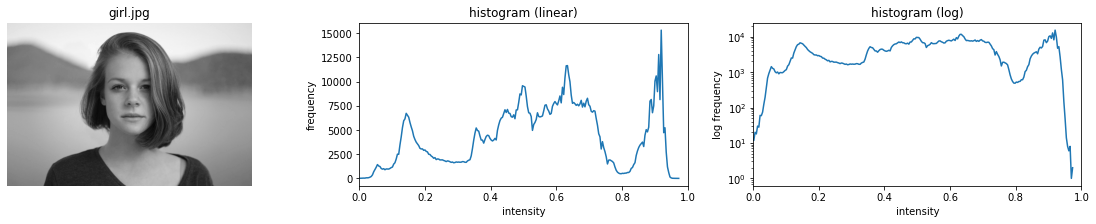

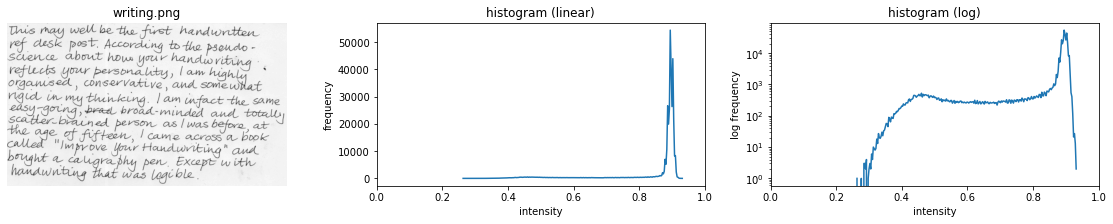

In [20]:
im_files = ['lake.jpg', 'flag.png', 'girl.jpg', 'writing.png']

for file in im_files:
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す

    fig = plt.figure(figsize=(20,3))

    ax = fig.add_subplot(1, 3, 1)
    im = rgb2gray(im) # 範囲は[0,1]
    imshow(im)
    plt.title(file)
    plt.axis('off')

    bins = 256

    ax = fig.add_subplot(1, 3, 2)
    freq, bins = histogram(im)
    plt.plot(bins, freq)
    plt.xlabel("intensity")
    plt.ylabel("frequency")
    plt.title('histogram (linear)')
    plt.xlim(0,1)


    ax = fig.add_subplot(1, 3, 3)
    freq, bins = histogram(im)
    plt.plot(bins, freq)
    plt.xlabel("intensity")
    plt.ylabel("log frequency")
    plt.yscale('log')
    plt.title('histogram (log)')
    plt.xlim(0,1)

    plt.show();

# 統計量

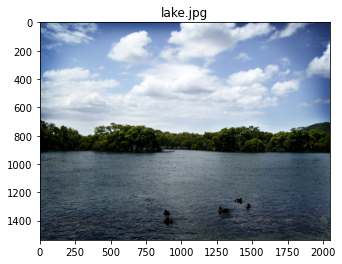

mean:  0.5037081347778416
std:  0.2841620496427796
median:  0.45636941176470586
max:  1.0
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  1.0



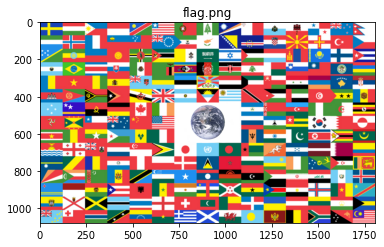

mean:  0.5482135267447418
std:  0.28582684534902325
median:  0.42936980392156865
max:  1.0
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  1.0



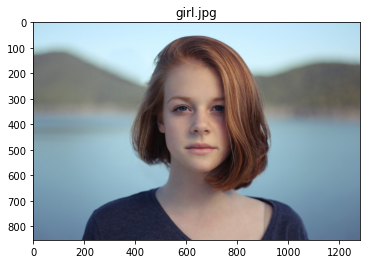

mean:  0.5493674004246111
std:  0.2266182695366989
median:  0.5669650980392158
max:  0.9750000000000001
min:  0.0
contrast:  1.0
contrast:  nan
contrast:  0.9750000000000001



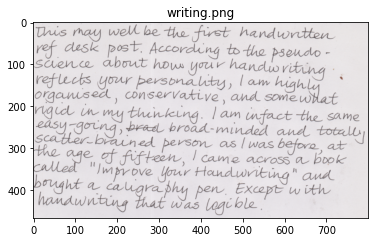

mean:  0.8507730295933578
std:  0.11681077843745837
median:  0.8940949019607843
max:  0.9324772549019609
min:  0.2621341176470588
contrast:  0.5611390889612472
contrast:  3.5572525364953136
contrast:  0.670343137254902



In [21]:
im_files = ['lake.jpg', 'flag.png', 'girl.jpg', 'writing.png']

for file in im_files:
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す
    imshow(im)
    plt.title(file)
    plt.show()
    
    im = rgb2gray(im)
    print('mean: ', im.mean())
    print('std: ', im.std())
    print('median: ', np.median(im))
    print('max: ', im.max())
    print('min: ', im.min())
    print('contrast: ', (im.max() - im.min()) / (im.max() + im.min()) ) # Michelson contrast
    print('contrast: ', im.max() / im.min() if im.min() > 0 else np.nan ) # contrast ratio
    print('contrast: ', im.max() - im.min() ) # contrast difference
    print()

## 平均と分散の計算方法

### 定義式そのまま
- 計算量大：2重ループ2回
- 書いてはいけないコード


In [22]:
im = rgb2gray(imread('girl.jpg'))

In [23]:
h, w = im.shape

mean = 0
for y in range(h):
    for x in range(w):
        mean += im[y, x]
mean /= h * w
print('mean: ', mean)

var = 0
for y in range(h):
    for x in range(w):
        var += (im[y, x] - mean)**2
var /= h * w
print('variance: ', var)
print('std: ', np.sqrt(var))

mean:  0.5493674004242163
variance:  0.05135584008781682
std:  0.22661826953671857


### 定義式を変形したもの
- 計算量は半分：2重ループ1回
- 数式から導出できる

$
\mu = \frac{1}{N} \sum_i x_i \\
\sigma^2 = \frac{1}{N} \sum_i (x_i - \mu)^2
= (\frac{1}{N} \sum_i x_i^2) - \mu^2
$

In [24]:
h, w = im.shape

mean = 0
var = 0
for y in range(h):
    for x in range(w):
        mean += im[y, x]
        var  += im[y, x]**2

mean /= h * w
print('mean: ', mean)

var /= h * w
var -= mean**2
print('variance: ', var)
print('std: ', np.sqrt(var))

mean:  0.5493674004242163
variance:  0.05135584008831057
std:  0.22661826953780792


# タスク

- カメラを手で抑えて真っ暗な画像を撮影する
- その画像を読み込み，ヒストグラムと統計量を計算する

# ガンマ変換

In [25]:
files = ['flag.png', 'lake.jpg', 'girl.jpg']

@interact(gamma=(0.1, 10, 0.1),
          file=files)
def g(gamma=1.0, file=files[0]):
    
    im = rgb2gray(imread(file)[:,:,:3])  # RGBAの場合はRGBだけ取り出す
    
    fig = plt.figure(figsize=(20, 3))

    ax = fig.add_subplot(1, 4, 1)
    imshow(im, vmin=0, vmax=1)
    plt.colorbar()
    plt.title('original image')
    
    ax = fig.add_subplot(1, 4, 2)
    im_gamma = adjust_gamma(im, gamma)
    imshow(im_gamma, vmin=0, vmax=1)
    plt.colorbar()
    plt.title('$\gamma$ = {}'.format(gamma))
    
    ax = fig.add_subplot(1, 4, 3)
    x = np.arange(0, 1, 0.01)
    plt.plot(x, x ** gamma)
    ax.set_aspect('equal')
    ax.set_xlabel('input')
    ax.set_ylabel('output')
    plt.title('$\gamma$ = {}'.format(gamma))

    ax = fig.add_subplot(1, 4, 4)  
    freq, bins = histogram(im_gamma)
    plt.plot(bins, freq)
    plt.xlim(0, 1)
    plt.xlabel("intensity")
    plt.ylabel("log frequency")
    plt.yscale('log')
    plt.title('histogram (log)')


    plt.show();

interactive(children=(FloatSlider(value=1.0, description='gamma', max=10.0, min=0.1), Dropdown(description='fi…

# チャンネル別のガンマ変換


In [27]:
vals = (val_start, val_end, val_step) = 0.1, 10, 0.1
val_default = 1.0

files = ['flag.png', 'lake.jpg', 'girl.jpg']

@interact(r_gamma=vals,
          g_gamma=vals,
          b_gamma=vals,
          file=files)
def g(r_gamma=val_default,
      g_gamma=val_default,
      b_gamma=val_default,
      file=files[0]):
    
    im = imread(file)[:,:,:3]  # RGBAの場合はRGBだけ取り出す
    
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im, vmin=0, vmax=255)
    plt.title('original image')
    
    ax = fig.add_subplot(1, 3, 2)
    im[:, :, 0] = 255 * (im[:, :, 0]/255) ** r_gamma
    im[:, :, 1] = 255 * (im[:, :, 1]/255) ** g_gamma
    im[:, :, 2] = 255 * (im[:, :, 2]/255) ** b_gamma
    imshow(im, vmin=0, vmax=1)
    plt.title('$\gamma$ = ({0},{1},{2})'.format(r_gamma, g_gamma, b_gamma))
    
    ax = fig.add_subplot(1, 3, 3)
    x = np.arange(0, 1, 0.01)
    plt.plot(x, x ** r_gamma, c='red', label='$\gamma$ for R')
    plt.plot(x, x ** g_gamma, c='green', label='$\gamma$ for G')
    plt.plot(x, x ** b_gamma, c='blue', label='$\gamma$ for B')
    plt.legend()
    ax.set_aspect('equal')
    ax.set_xlabel('input')
    ax.set_ylabel('output')

    plt.show();

interactive(children=(FloatSlider(value=1.0, description='r_gamma', max=10.0, min=0.1), FloatSlider(value=1.0,…

# 疑似カラー表示

In [28]:
im = rgb2gray(imread('IR_cat.jpg'))

cmaps = ['gray', 'gray_r', 
         'jet', 'jet_r',
         'rainbow', 'rainbow_r',
         'hsv', 'hsv_r',
         'terrain', 'terrain_r'
       ]

@interact(cmap=RadioButtons(options=cmaps))
def g(cmap='gray'):
    
    imshow(im, cmap=cmap)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

interactive(children=(RadioButtons(description='cmap', options=('gray', 'gray_r', 'jet', 'jet_r', 'rainbow', '…

# 画像間の演算

## 平均

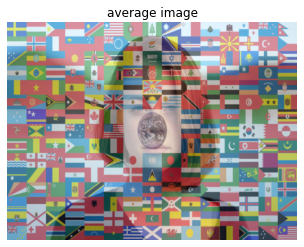

In [29]:
im1 = imread('girl.jpg')
im2 = imread('flag.png')[:,:,:3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3)) #サイズを合わせて　足して二で割る
im2 = resize(im2, (480, 640, 3))

im_ave = (im1 + im2) / 2
imshow(im_ave)
plt.axis('off')
plt.title('average image')
plt.show();

## 重み付き平均

In [30]:
vals = (val_start, val_end, val_step) = 0.0, 1, 0.1
val_default = 0.5

im1 = imread('girl.jpg')
im2 = imread('flag.png')[:,:,:3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3))
im2 = resize(im2, (480, 640, 3))

@interact(alpha=vals)
def g(alpha=val_default):
    
    
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    im_weighted_ave = alpha * im1 + (1 - alpha) * im2
    imshow(im_weighted_ave)
    
    ax = fig.add_subplot(1, 3, 2)
    imshow(alpha * im1)
    plt.title('weight: {:.2f}'.format(alpha))
    

    ax = fig.add_subplot(1, 3, 3)
    imshow((1 - alpha) * im2)
    plt.title('weight: {:.2f}'.format(1 - alpha))

    

    plt.show()


interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

## アルファブレンディング

In [ ]:
vals = (val_start, val_end, val_step) = 0, 640, 20
val_default = 320

im1 = imread('girl.jpg')
im2 = imread('flag.png')[:, :, :3] # alphaチャンネルを除去

im1 = resize(im1, (480, 640, 3))
im2 = resize(im2, (480, 640, 3))

@interact(center=vals)
def g(center=val_default):
    

    alpha_mask = np.zeros((480, 640, 3))
    for y in range(480):
        for x in range(640):
            alpha_mask[y, x, :] = 1 / (1 + np.exp(-(x - center) * 0.015))
    
    
    im1_a = im1 * alpha_mask
    im2_a = im2 * (1 - alpha_mask)

    
    fig = plt.figure(figsize=(15, 6))

    
    ax = fig.add_subplot(2, 3, 1)
    im_weighted_ave = im1_a + im2_a
    imshow(im_weighted_ave)
    
    ax = fig.add_subplot(2, 3, 2)
    imshow(im1_a)
   
    ax = fig.add_subplot(2, 3, 3)
    imshow(im2_a)

    ax = fig.add_subplot(2, 3, 5)
    imshow(alpha_mask)
   
    ax = fig.add_subplot(2, 3, 6)
    imshow(1 - alpha_mask)

   
    plt.show()


# 二値化

In [31]:
im = rgb2gray(imread('text.jpg'))


@interact(block_size=(1, 500, 10))
def g(block_size=51):
   
    fig = plt.figure(figsize=(15, 2.5))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')
    
    ax = fig.add_subplot(1, 3, 2)
    global_th = threshold_otsu(im)
    binary_global = im > global_th
    imshow(binary_global)
    plt.axis('off')
    plt.title('global thresholding by Otsu th')


    ax = fig.add_subplot(1, 3, 3)
    adaptive_th = threshold_local(im, block_size)
    binary_adaptive = im > adaptive_th
    imshow(binary_adaptive)
    plt.title('adaptive thresholding with {0}x{0} block'.format(block_size))
    plt.axis('off')


    plt.show()


interactive(children=(IntSlider(value=51, description='block_size', max=500, min=1, step=10), Output()), _dom_…

# ラベリング

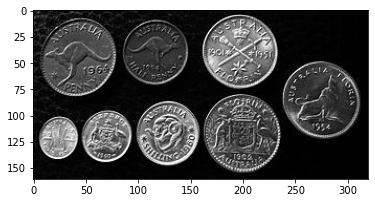

In [32]:
img = rgb2gray(imread('coins.jpg'))
imshow(img)

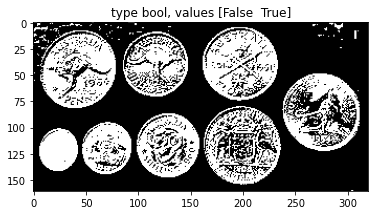

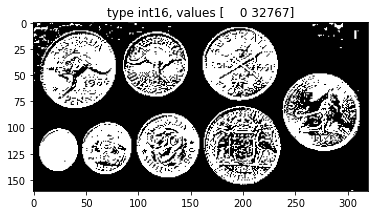

In [33]:
block_size = 121

img2 = img > threshold_local(img, block_size)
imshow(img2)
plt.title('type {0}, values {1}'.format(img2.dtype, np.unique(img2)))
plt.show()

img2i = skimage.img_as_int(img2)
imshow(img2i)
plt.title('type {0}, values {1}'.format(img2i.dtype, np.unique(img2i)))
plt.show()

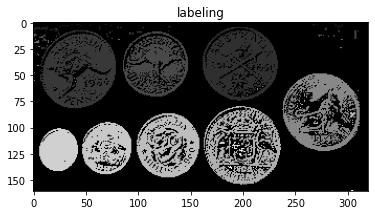

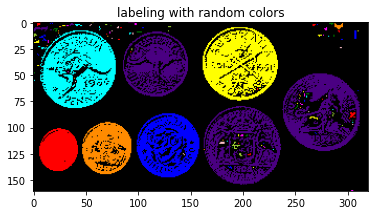

In [34]:
img2il = measure.label(img2i) # ラベリング

imshow(img2il) # ラベリング結果の表示．輝度値はラベル番号
plt.title('labeling')
plt.show()

imshow(color.label2rgb(img2il, bg_label=0)) # ラベリング結果をカラーで表示．
plt.title('labeling with random colors')
plt.show()

# モルフォロジー処理

In [35]:
@interact(element=['disk', 'square'],
          size=(1, 10, 1)
         )
def g(element='disk', size=1):
    
    if element == 'square':
        disk = morphology.square(size)
    else:
        disk = morphology.disk(size)


    fig = plt.figure(figsize=(20, 6))
    
    fig.add_subplot(2, 4, 1)
    imshow(img2il) # ラベリング結果の表示．輝度値はラベル番号
    plt.title('labeling')
    plt.axis('off')

    
    img2im = img2il.copy()

    fig.add_subplot(2, 4, 2)
    img2im = morphology.binary_dilation(img2im, disk)
    img2im = morphology.binary_erosion(img2im, disk)
    imshow( measure.label(img2im) )
    plt.title('filling holes')
    plt.axis('off')



    fig.add_subplot(2, 4, 3)
    img2im = morphology.binary_erosion(img2im, disk)
    img2im = morphology.binary_dilation(img2im, disk)
    imshow( measure.label(img2im) )
    plt.title('remove small regions')
    plt.axis('off')



    fig.add_subplot(2, 4, 4)
    imshow(color.label2rgb(measure.label(img2im), bg_label=0))
    plt.title('labeling after morphorogy operations')
    plt.axis('off')

    
    fig.add_subplot(2, 4, 8)
    # 各物体の凸包を求めると，もっときれいになる
    img2im = measure.label(morphology.convex_hull_object(img2im))
    imshow(color.label2rgb(img2im, bg_label=0))
    plt.title('convex hulls')
    plt.axis('off')


    plt.show()
    

interactive(children=(Dropdown(description='element', options=('disk', 'square'), value='disk'), IntSlider(val…

# 細線化

In [ ]:
img = (imread('evol.png')[:,:,3] > 1).astype(int) # 実はRGBA画像なので，まずRGB値を使ってboolへ変換

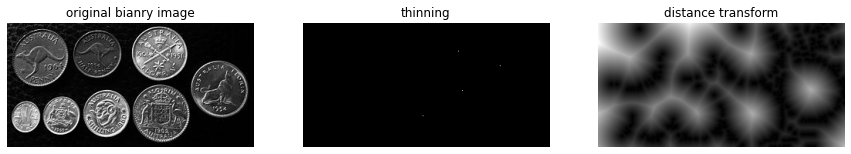

In [36]:
fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(1, 3, 1)
imshow(img)
plt.title('original bianry image')
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
thin_img = morphology.skeletonize(img)
imshow(thin_img)
plt.title('thinning')
plt.axis('off')


ax = fig.add_subplot(1, 3, 3)
_, dist = morphology.medial_axis(img, return_distance=True)
imshow(dist) # 距離変換画像．これを使って細線化を行っているはず
plt.title('distance transform')
plt.axis('off')

plt.show()